# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** DAVA IKHSAN REYVAN
- **Email:** dvaikhsn@gmail.com & mc126d5y1520@student.devacademy.id
- **ID Dicoding:** dvaikhsn

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
1. Bagaimana pola perbedaan jumlah penyewaan sepeda setelah hari libur besar dibandingkan dengan hari biasa?
- Pertanyaan 2
2. Apakah ada pengaruh dari perubahan suhu terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)

Pandas: 2.2.2
Matplotlib: 3.10.0
Seaborn: 0.13.2


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [114]:
# Memuat dataset harian
day_df = pd.read_csv('/content/drive/My Drive/Proyek_Analisis_Data_Python/day.csv')
hour_df = pd.read_csv('/content/drive/My Drive/Proyek_Analisis_Data_Python/hour.csv')

Dalam analisis ini saya analisis penyewaan sepeda berdasarkan hari, sehingga data yang akan di lihat adalah pada variabel day_df

In [115]:
# Melihat 5 baris pertama dari dataset
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [116]:
# Informasi awal dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset day.csv dari variabel day_df dimuat untuk analisis penyewaan sepeda berdasarkan hari.

- Fitur yang digunakan yaitu, tanggal, suhu, kelembaban, kecepatan angin, jumlah penyewaan, dan kategori hari kerja/libur.

### Assessing Data

In [117]:
# Mengecek jumlah missing values
missing_values = day_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [118]:
# Mengecek apakah ada duplikasi data
duplicates = day_df.duplicated().sum()
print("Jumlah duplikasi:", duplicates)

Jumlah duplikasi: 0


In [119]:
# Statistik deskriptif dataset
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:**
- Dataset memiliki 731 entri tanpa missing values dan duplikasi.

- Semua kolom memiliki tipe data yang sesuai, seperti datetime untuk kolom tanggal.


### Cleaning Data

In [120]:
# Konversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [121]:
# Menambahkan kolom 'after_holiday'
holiday_dates = ["2011-12-25", "2012-12-25", "2011-01-01", "2012-01-01"]
day_df['after_holiday'] = day_df['dteday'].astype(str).isin(
    [(pd.to_datetime(date) + pd.Timedelta(days=1)).strftime("%Y-%m-%d") for date in holiday_dates]
)

In [122]:
# Menambahkan label musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df['season'] = day_df['season'].map(season_labels)

In [123]:
# Menghitung rata-rata suhu per musim
avg_temp_per_season = day_df.groupby('season')['temp'].mean()

In [124]:
# Menambahkan kolom 'temp_deviation'
day_df['temp_deviation'] = day_df.apply(lambda row: abs(row['temp'] - avg_temp_per_season[row['season']]), axis=1)

In [125]:
# Menghapus kolom tidak relevan
day_df = day_df.drop(columns=['instant', 'atemp'])

In [126]:
# Melihat dataset setelah cleaning
print(day_df.head())

      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01  Spring   0     1        0        6           0           2   
1 2011-01-02  Spring   0     1        0        0           0           2   
2 2011-01-03  Spring   0     1        0        1           1           1   
3 2011-01-04  Spring   0     1        0        2           1           1   
4 2011-01-05  Spring   0     1        0        3           1           1   

       temp       hum  windspeed  casual  registered   cnt  after_holiday  \
0  0.344167  0.805833   0.160446     331         654   985          False   
1  0.363478  0.696087   0.248539     131         670   801           True   
2  0.196364  0.437273   0.248309     120        1229  1349          False   
3  0.200000  0.590435   0.160296     108        1454  1562          False   
4  0.226957  0.436957   0.186900      82        1518  1600          False   

   temp_deviation  
0        0.046419  
1        0.065730  
2        0.101384  


In [127]:
# Membaut copyan data yang udah clean
cleaned_df = day_df.copy()

**Insight:**
- Kolom instant dan atemp dihapus karena tidak relevan untuk analisis.

- Menambah kolom after_holiday untuk menandai apakah hari itu adalah hari setelah libur besar atau bukan.

- Menambah kolom temp_deviation untuk menghitung deviasi suhu dari rata-rata musimnya.



## Exploratory Data Analysis (EDA)

### Explore ...

In [128]:
# Menambahkan kolom 'day_type'
day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur')

# Mengelompokkan data berdasarkan musim dan jenis hari
grouped = day_df.groupby(['season', 'day_type']).mean()

# Menampilkan rata-rata suhu dan deviasi suhu
result = grouped[['temp', 'temp_deviation']]
print(result)


                       temp  temp_deviation
season day_type                            
Fall   Hari Kerja  0.706132        0.053924
       Hari Libur  0.706717        0.053975
Spring Hari Kerja  0.304338        0.086015
       Hari Libur  0.284782        0.071708
Summer Hari Kerja  0.543581        0.098450
       Hari Libur  0.546289        0.104995
Winter Hari Kerja  0.432760        0.092901
       Hari Libur  0.401988        0.088031


### **Distribusi Jumlah Penyewaan Sepeda**
Melihat distribusi jumlah penyewaan sepeda setiap hari.

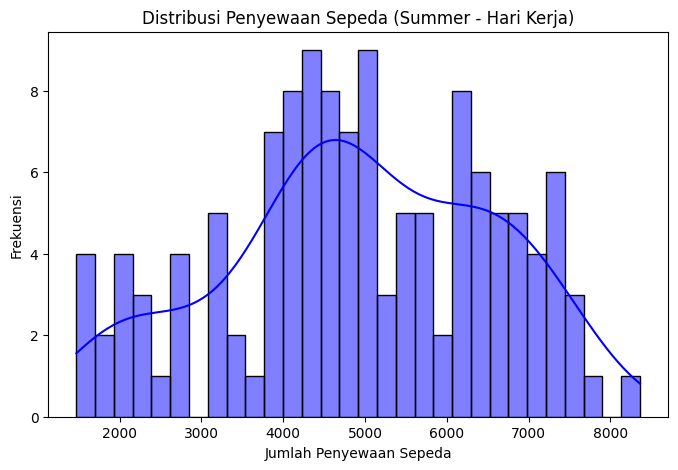

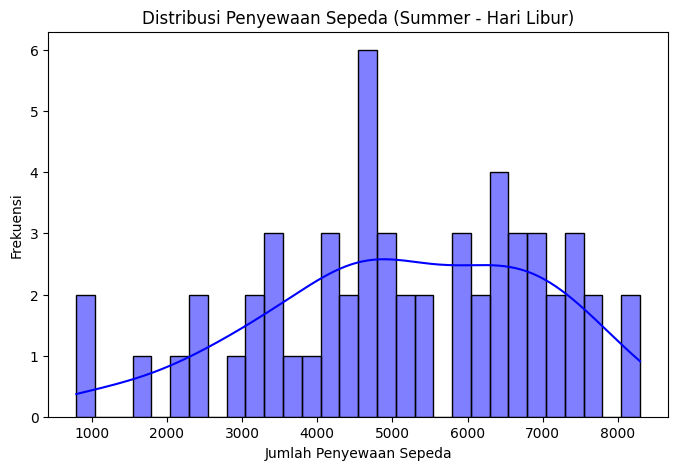

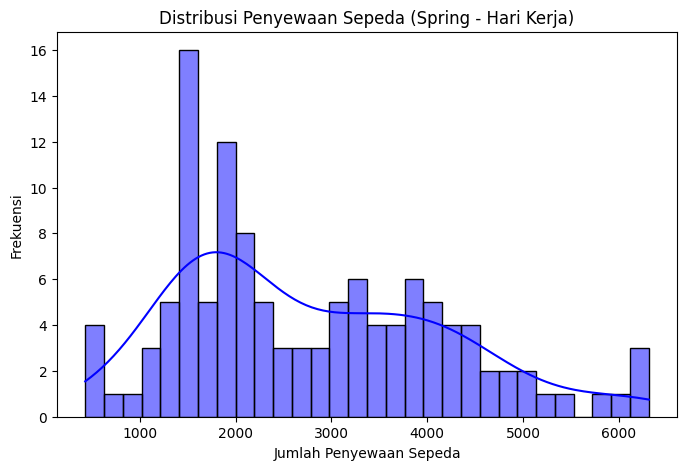

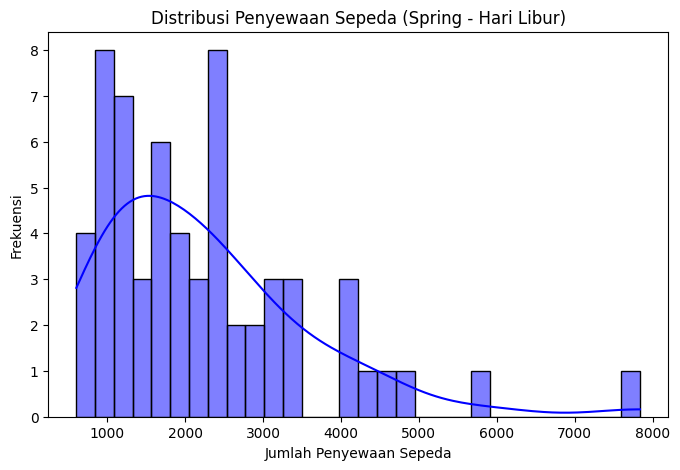

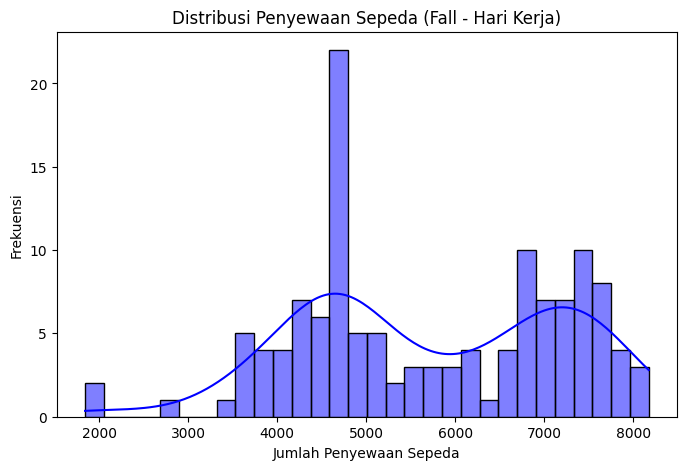

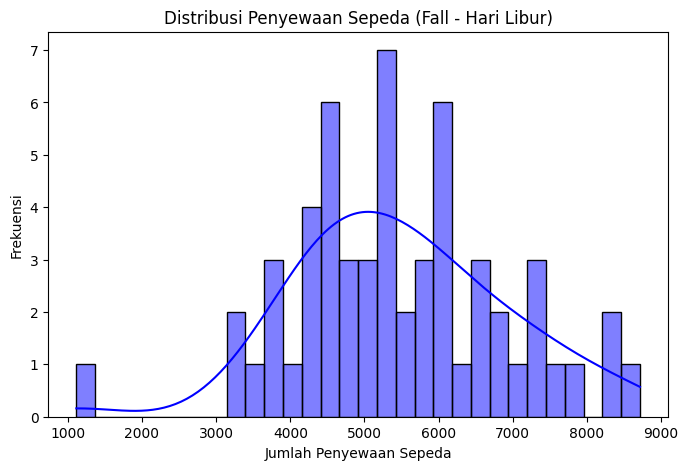

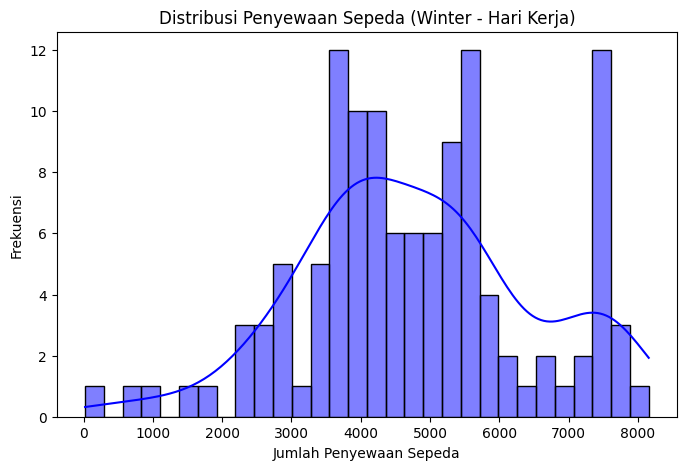

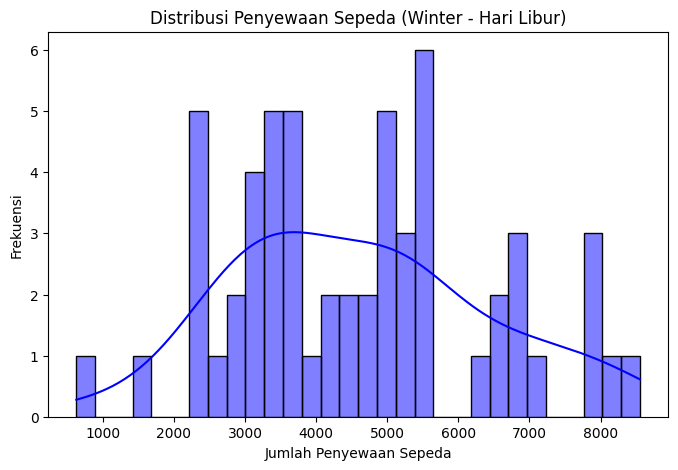

In [129]:
# Contoh pengelompokan
seasons = ["Summer", "Spring", "Fall", "Winter"]
day_types = ["Hari Kerja", "Hari Libur"]

for season in seasons:
    for day_type in day_types:
        filtered_df = day_df[(day_df['season'] == season) & (day_df['day_type'] == day_type)]

        # Visualisasi histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(filtered_df['cnt'], bins=30, kde=True, color="blue")
        plt.title(f"Distribusi Penyewaan Sepeda ({season} - {day_type})")
        plt.xlabel("Jumlah Penyewaan Sepeda")
        plt.ylabel("Frekuensi")
        plt.show()


**Insight:**
- Penyewaan sepeda menunjukkan distribusi normal dengan beberapa outlier.

### **Penyewaan Sepeda Berdasarkan Musim**
Melihat pola musiman dalam jumlah penyewaan sepeda.

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
season_avg = day_df.groupby('season')['cnt'].mean().reset_index()

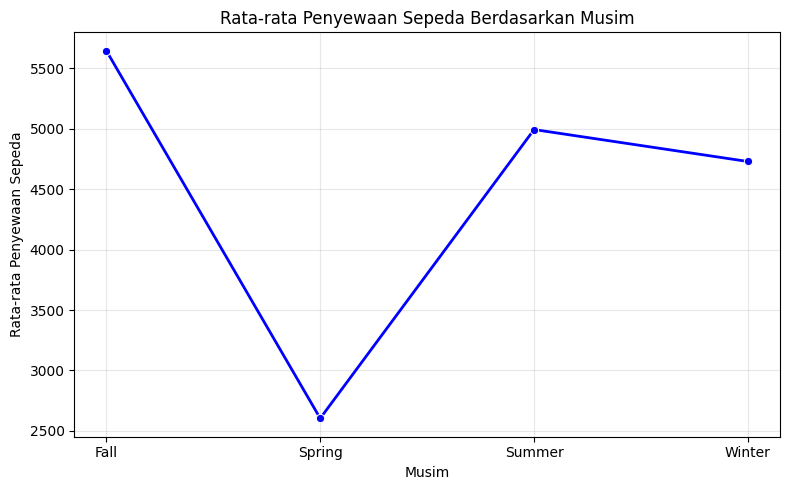

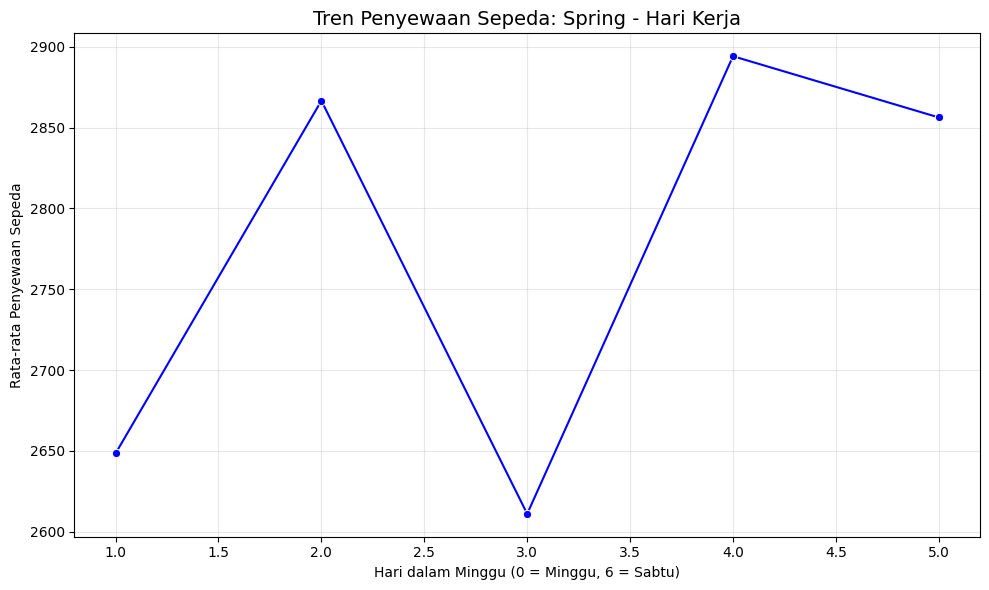

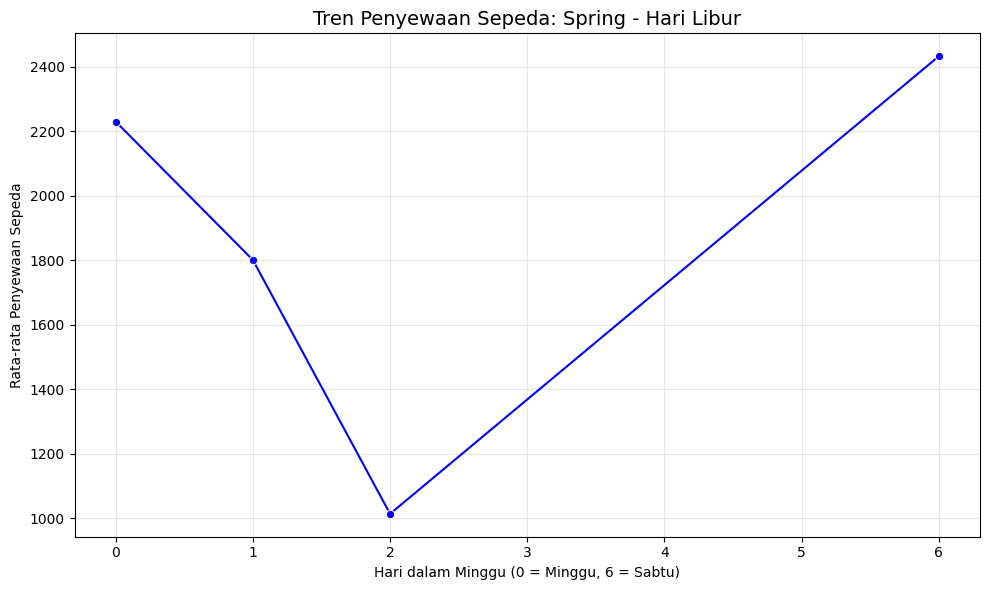

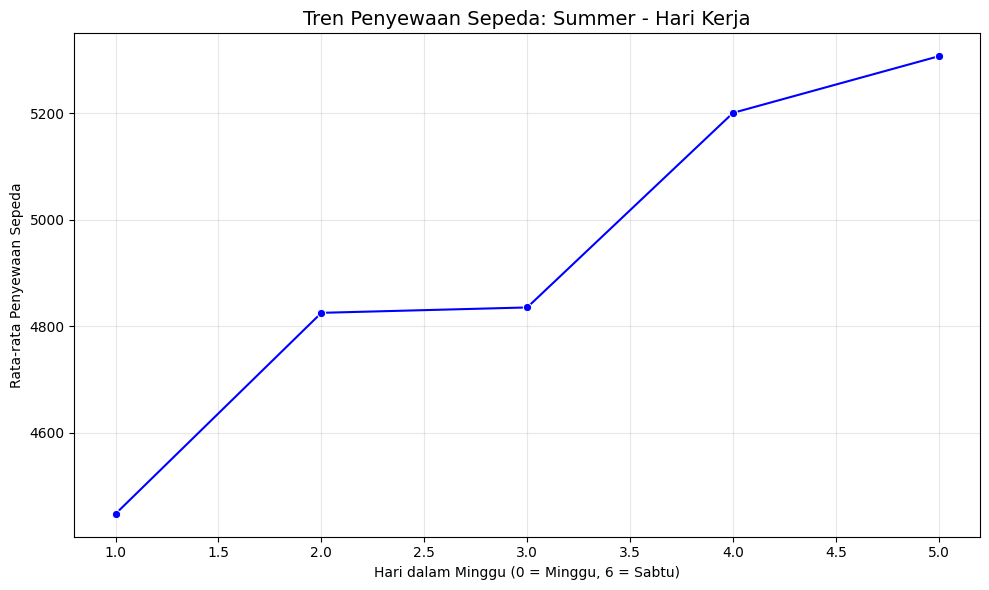

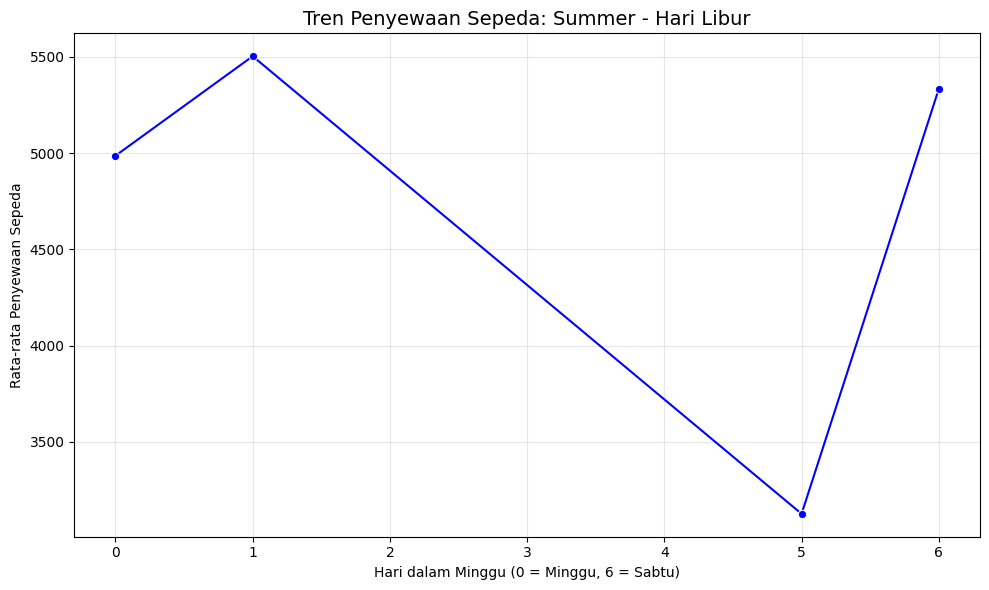

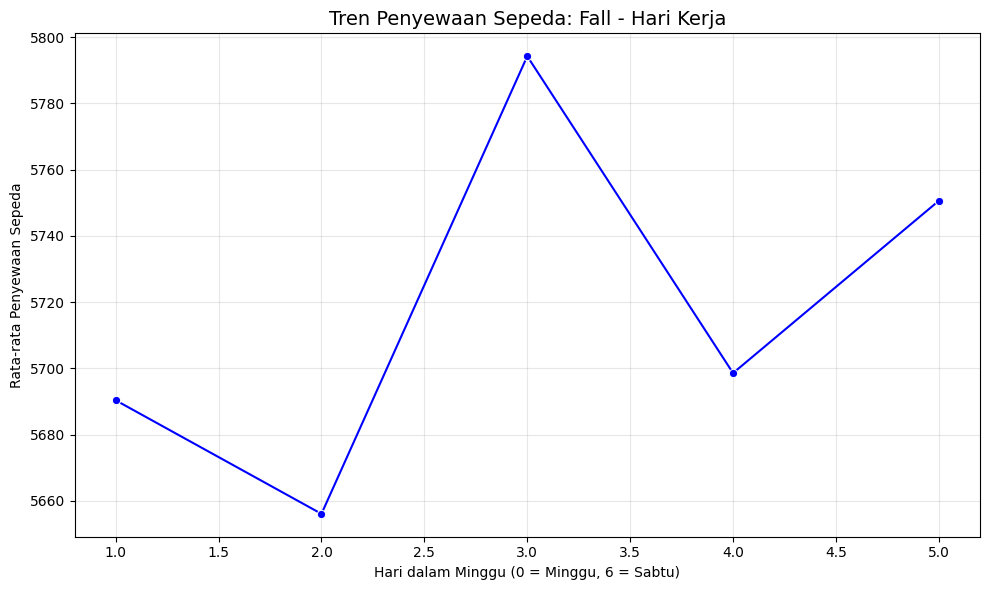

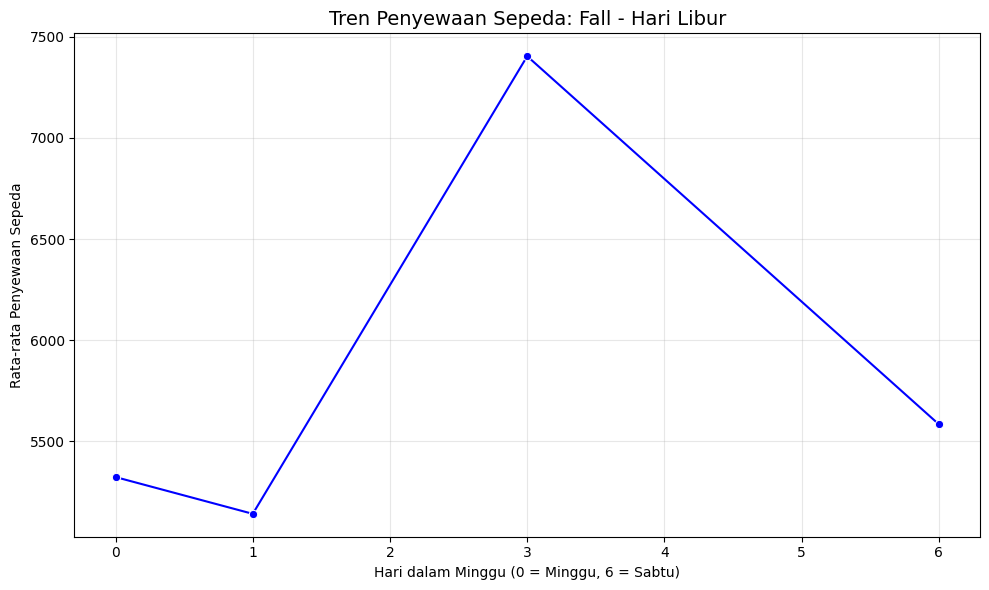

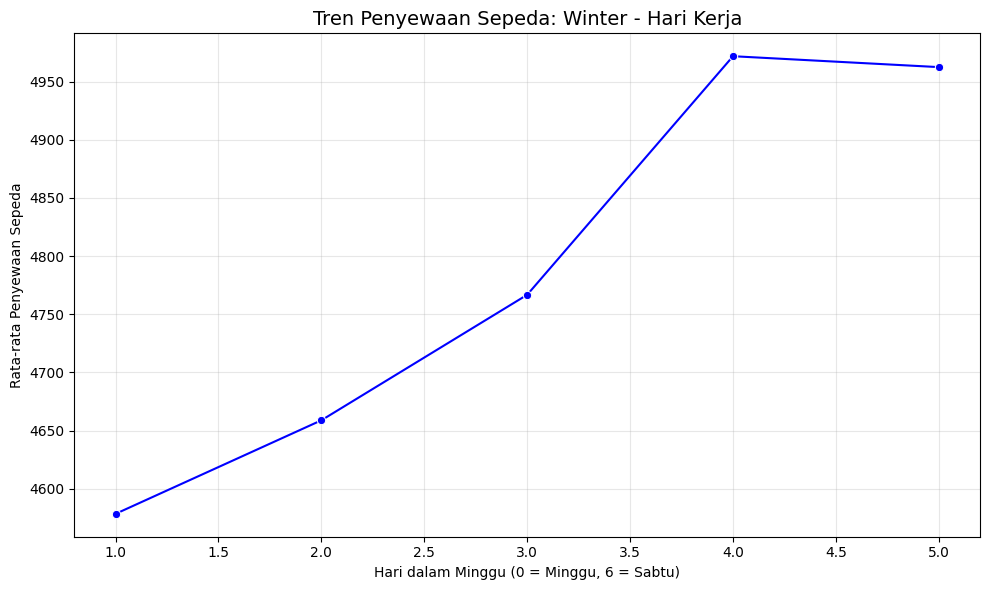

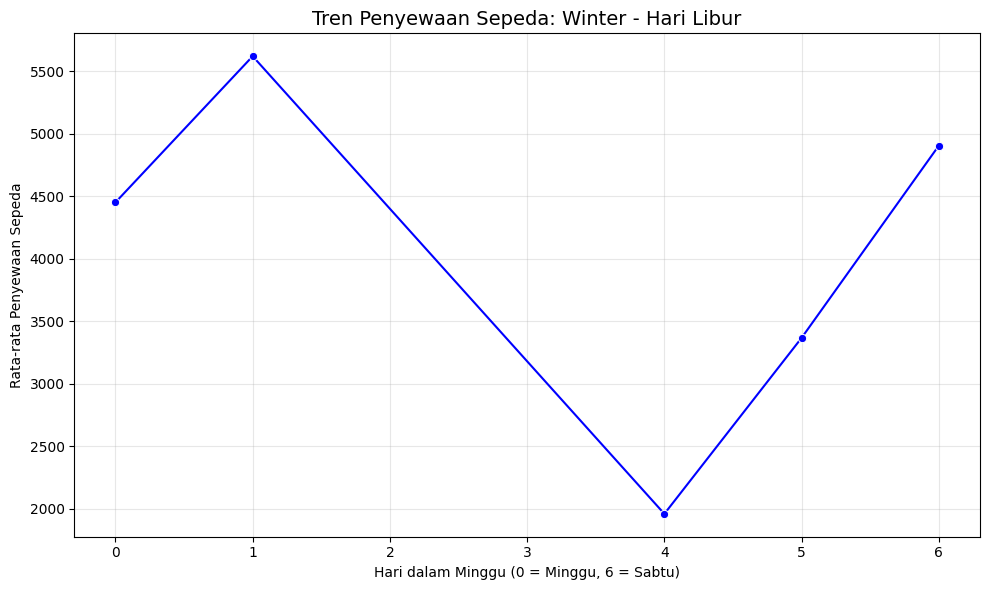

In [156]:
# Visualisasi dengan line plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=season_avg, x='season', y='cnt', marker='o', color="blue", linewidth=2)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

for season in seasons:
    for day_type in day_types:
        # Filter data berdasarkan musim dan kategori hari
        filtered_data = day_df[(day_df['season'] == season) & (day_df['day_type'] == day_type)]

        # Cek apakah ada data sebelum membuat plot
        if not filtered_data.empty:
            # Hitung rata-rata penyewaan sepeda berdasarkan weekday
            avg_per_day = filtered_data.groupby('weekday')['cnt'].mean().reset_index()

            plt.figure(figsize=(10, 6))
            sns.lineplot(data=avg_per_day, x='weekday', y='cnt', marker="o", color="b")
            plt.title(f"Tren Penyewaan Sepeda: {season} - {day_type}", fontsize=14)
            plt.xlabel("Hari dalam Minggu (0 = Minggu, 6 = Sabtu)")
            plt.ylabel("Rata-rata Penyewaan Sepeda")
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()

**Insight:**
- Musim gugur dan musim panas adalah jumlah penyewaan tertinggi.

### **Penyewaan Sepeda Berdasarkan Hari dalam Seminggu**
Memeriksa pola penggunaan sepeda pada hari kerja dan akhir pekan.

<ipython-input-146-50baf56d79be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='weekday', y='cnt', palette="viridis")


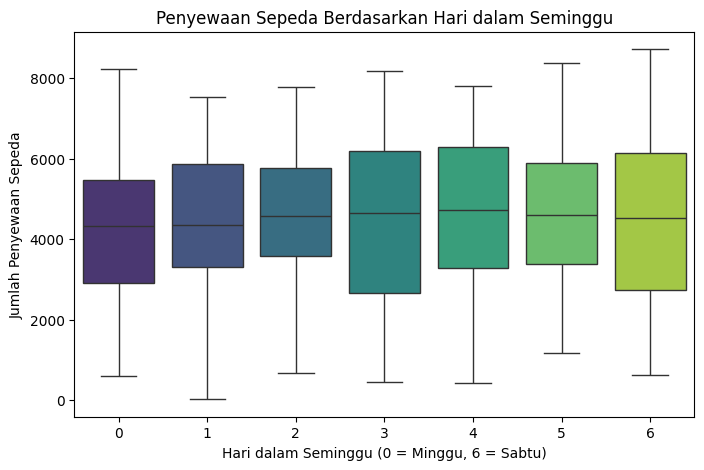

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


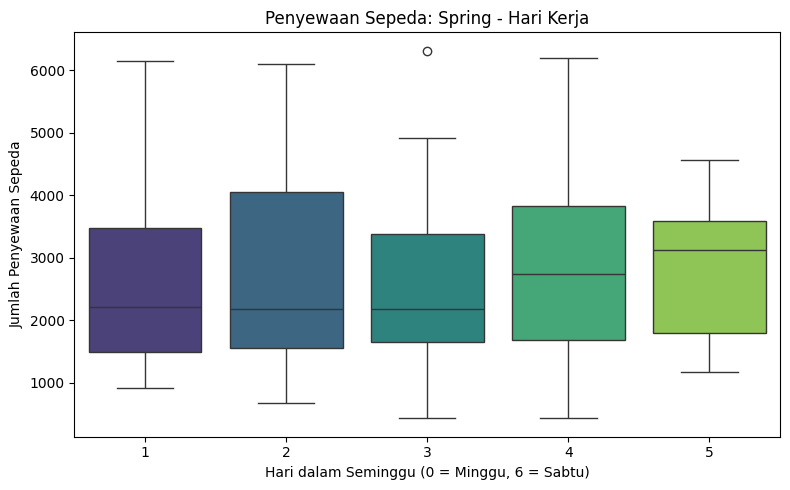

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


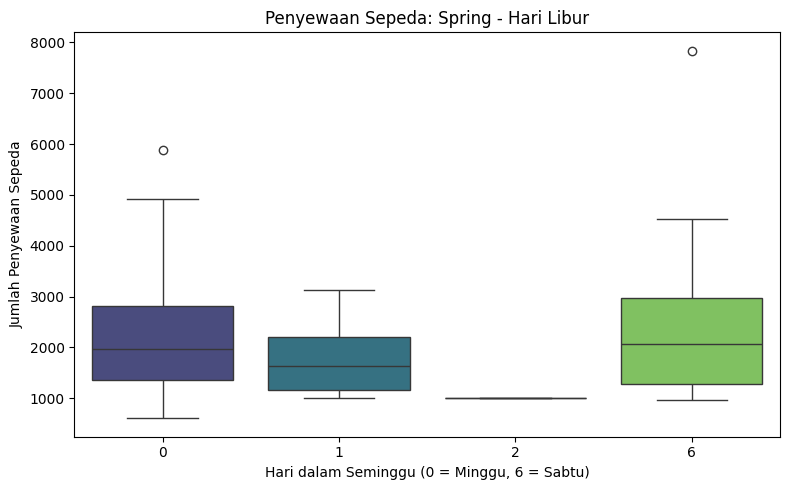

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


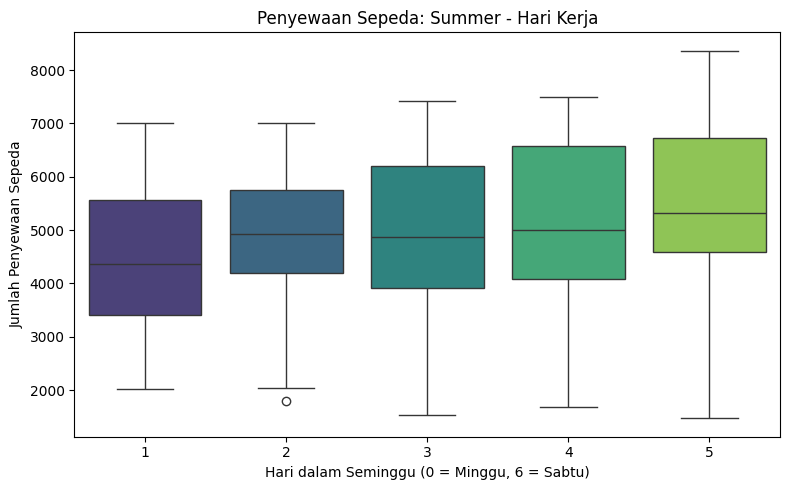

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


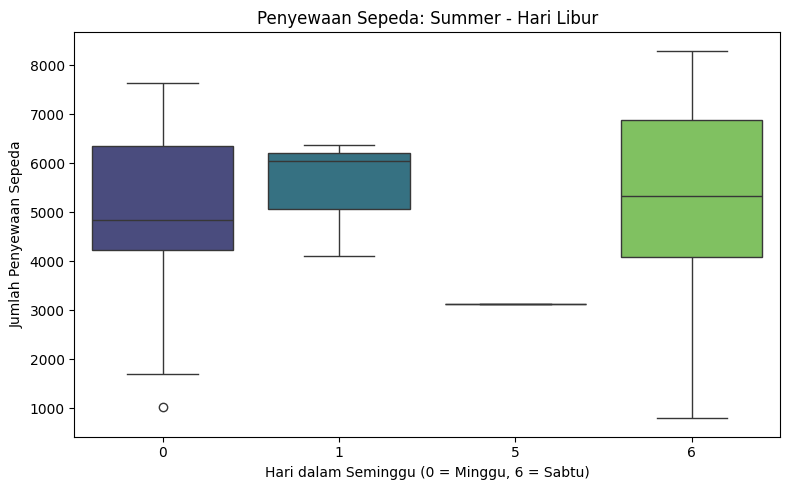

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


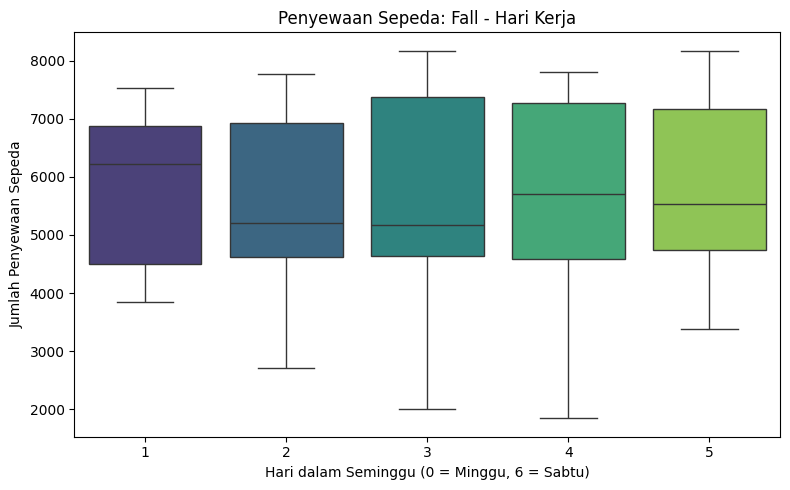

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


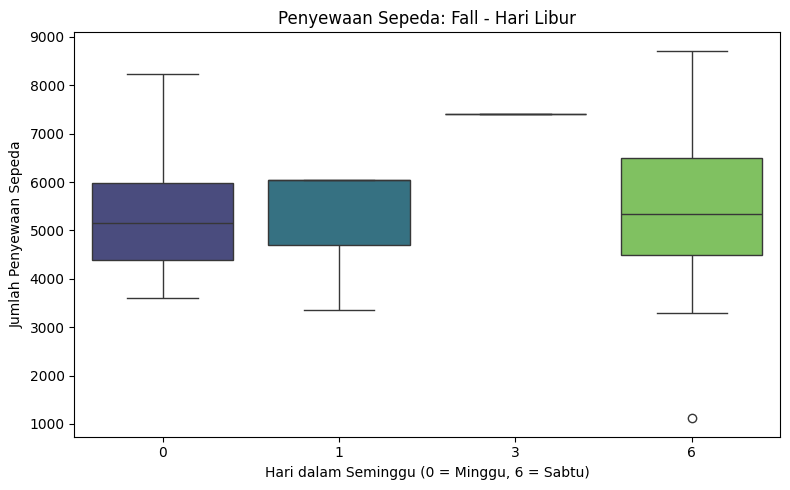

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


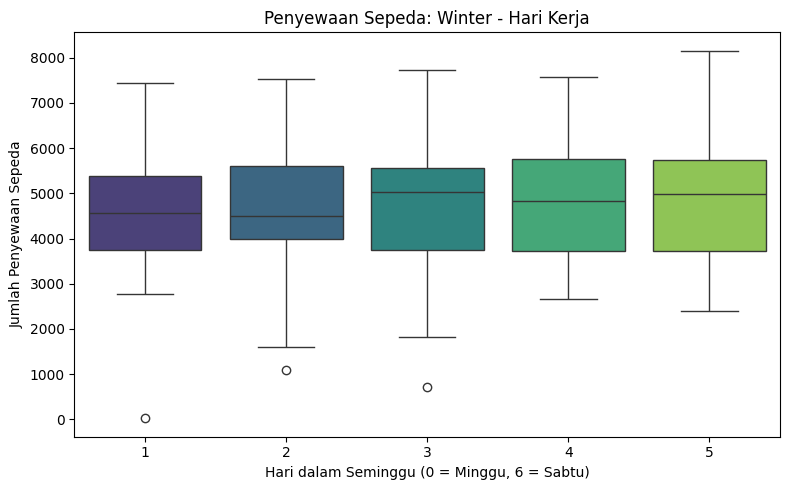

<ipython-input-146-50baf56d79be>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")


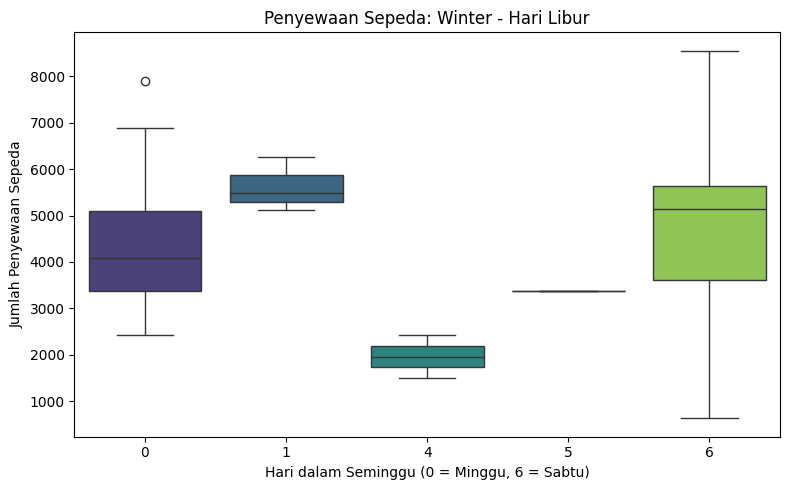

In [146]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='weekday', y='cnt', palette="viridis")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.show()

for season in seasons:
    for day_type in day_types:
        # Filter data berdasarkan musim dan kategori hari
        filtered_data = day_df[(day_df['season'] == season) & (day_df['day_type'] == day_type)]

        # Cek apakah ada data sebelum membuat plot
        if not filtered_data.empty:
            # Membuat satu plot per kombinasi
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=filtered_data, x='weekday', y='cnt', palette="viridis")
            plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
            plt.ylabel("Jumlah Penyewaan Sepeda")
            plt.title(f"Penyewaan Sepeda: {season} - {day_type}")
            plt.tight_layout()
            plt.show()

**Insight:**
- Hari kerja memiliki pola penyewaan lebih stabil, sedangkan hari libur lebih bervariasi.

### **Hubungan Suhu dengan Jumlah Penyewaan Sepeda**
Menganalisis hubungan antara suhu dengan penyewaan sepeda.

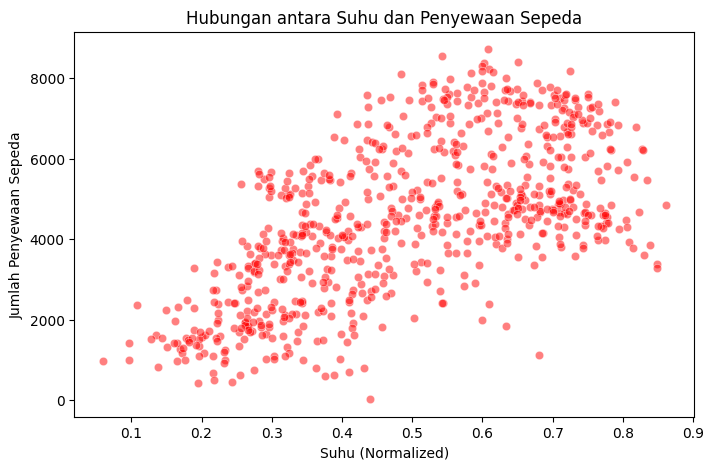

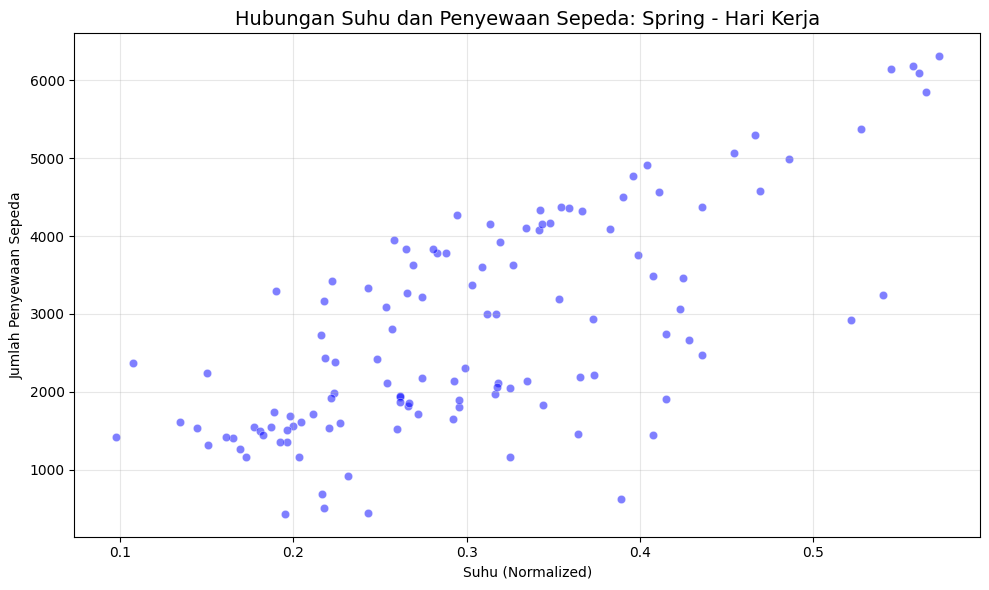

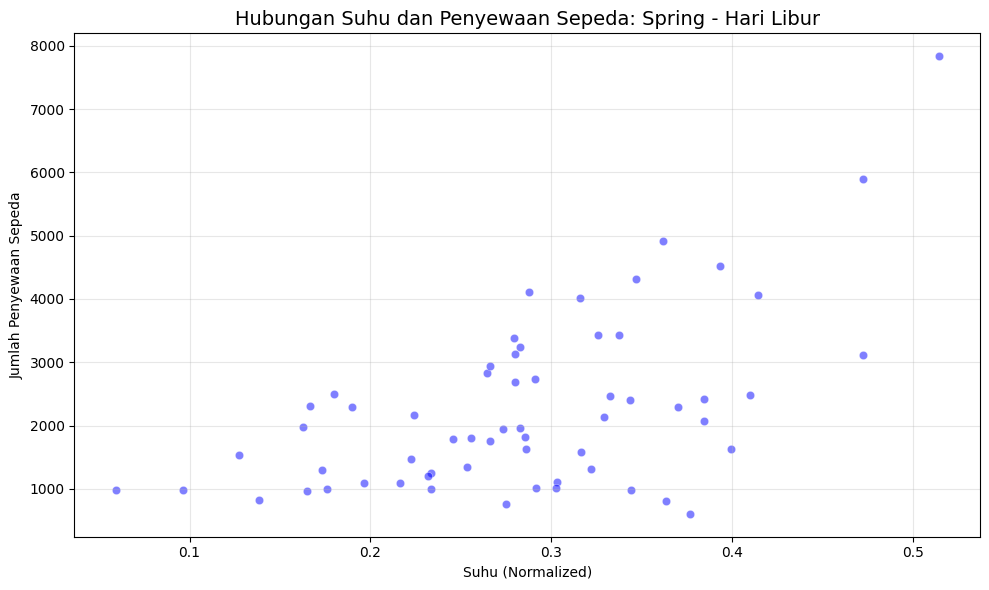

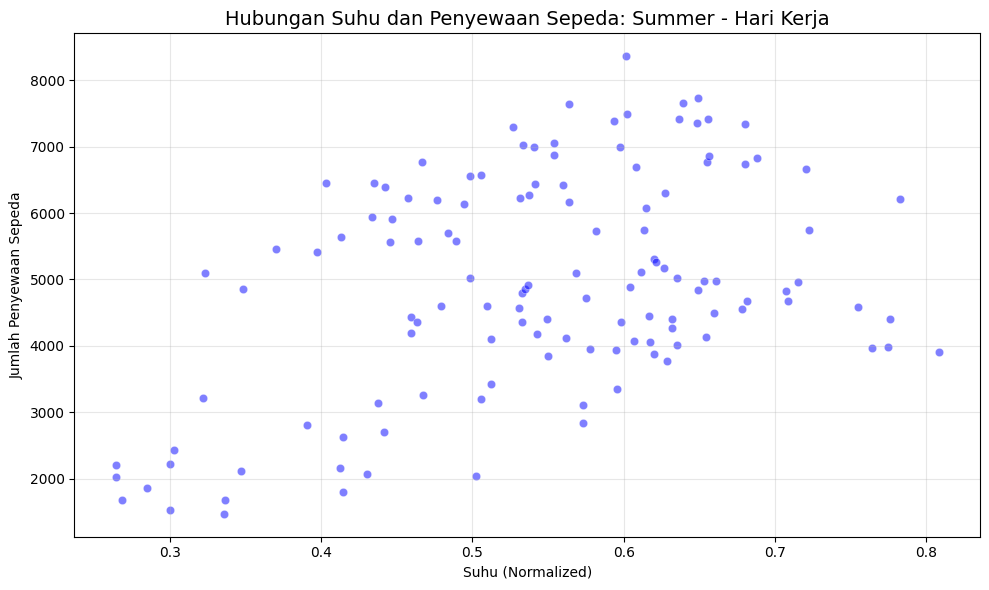

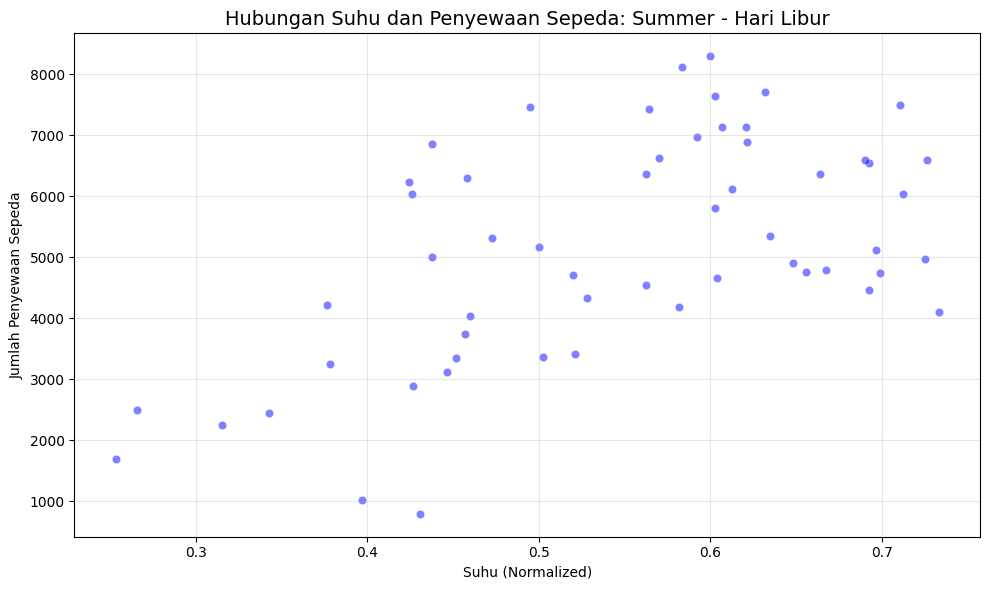

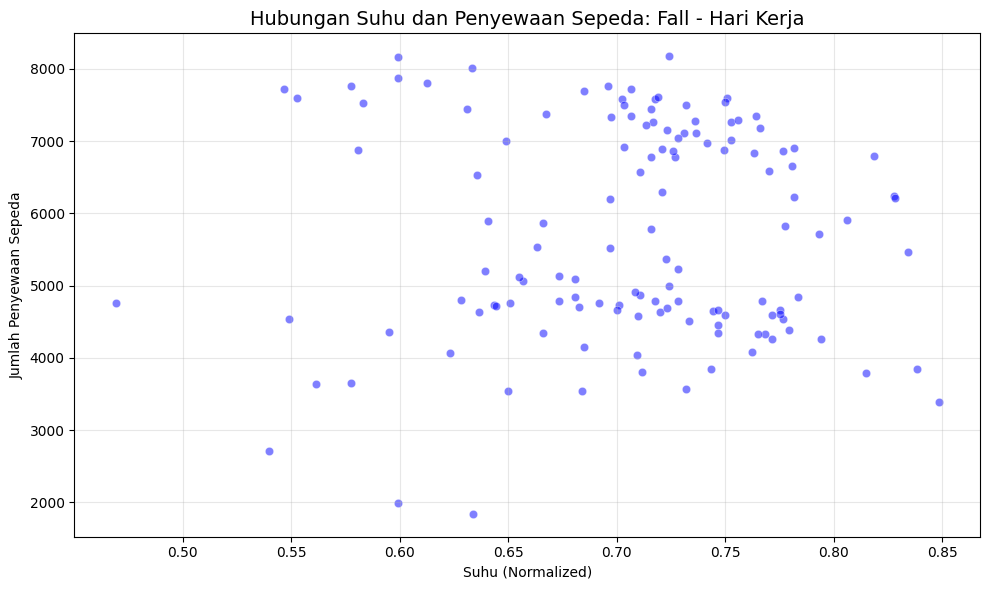

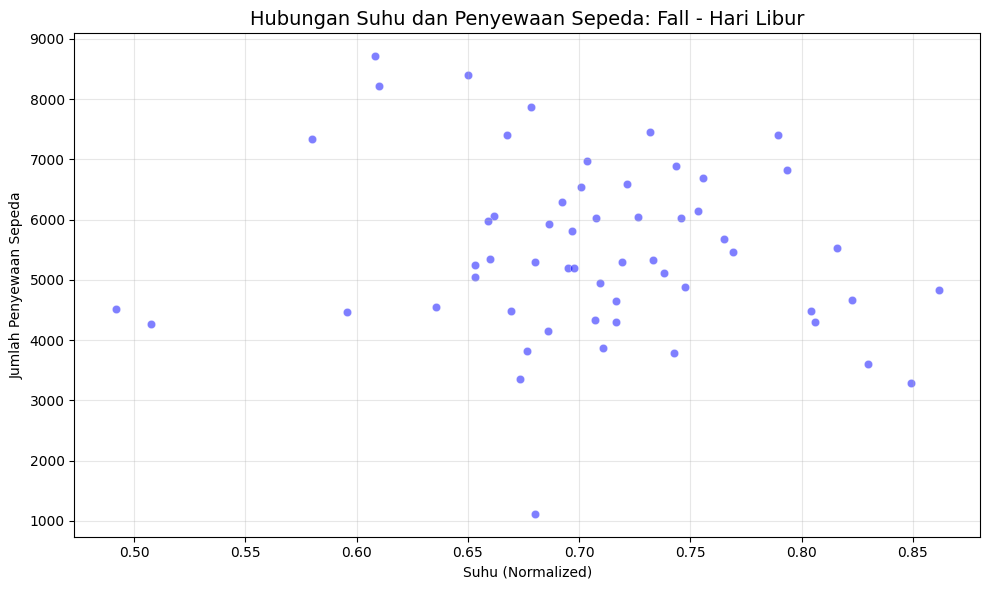

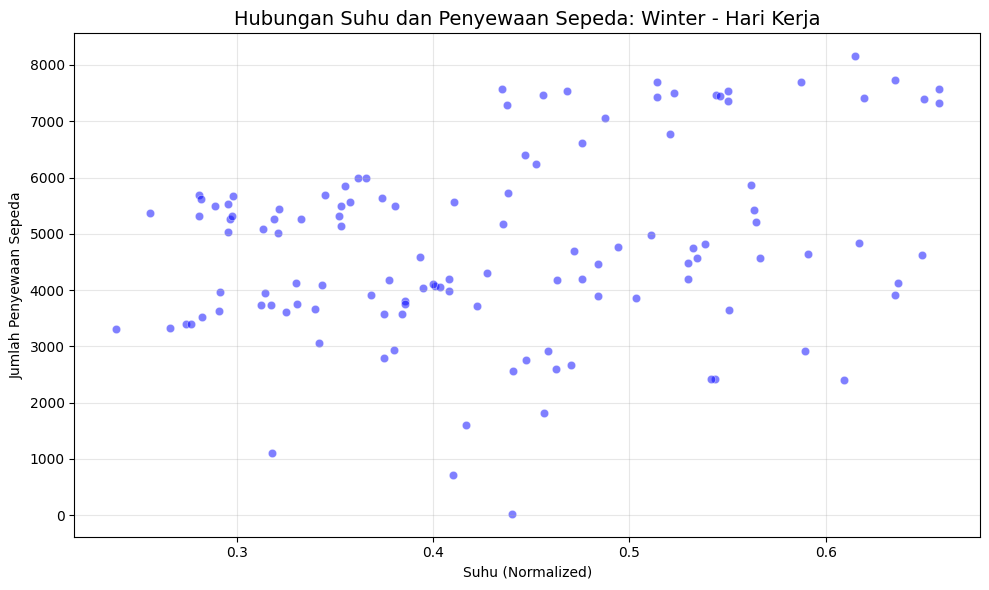

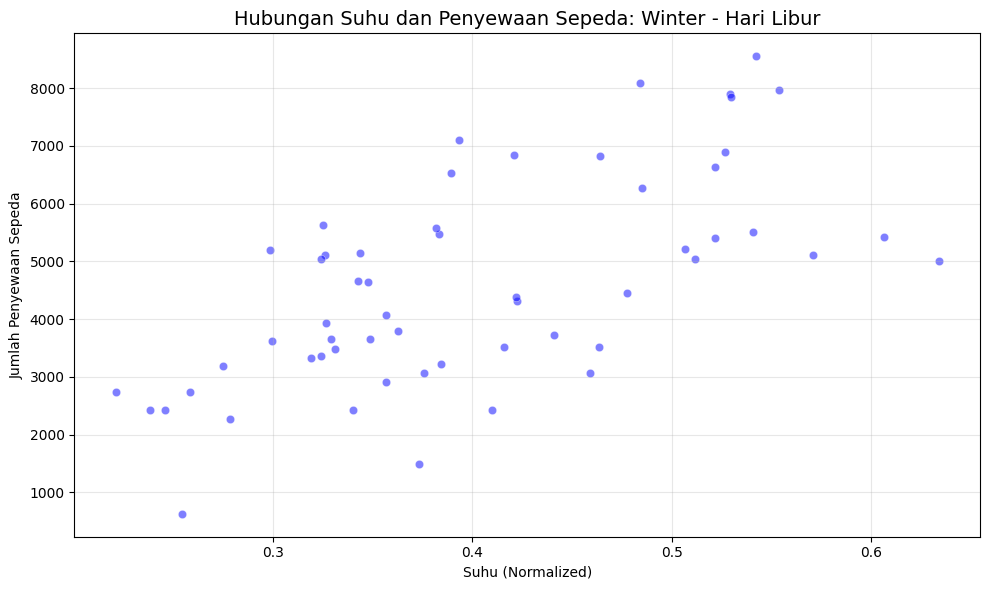

In [147]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=day_df, x='temp', y='cnt', alpha=0.5, color="red")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan antara Suhu dan Penyewaan Sepeda")
plt.show()

for season in seasons:
    for day_type in day_types:
        # Filter data berdasarkan musim dan kategori hari
        filtered_data = day_df[(day_df['season'] == season) & (day_df['day_type'] == day_type)]

        # Cek apakah ada data sebelum membuat plot
        if not filtered_data.empty:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=filtered_data, x='temp', y='cnt', alpha=0.5, color="blue")
            plt.title(f"Hubungan Suhu dan Penyewaan Sepeda: {season} - {day_type}", fontsize=14)
            plt.xlabel("Suhu (Normalized)")
            plt.ylabel("Jumlah Penyewaan Sepeda")
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()

**Insight:**
- Suhu yang lebih tinggi cenderung meningkatkan penyewaan sepeda.

### **Korelasi Antar Variabel dalam Dataset**
Melihat hubungan antar variabel menggunakan heatmap.

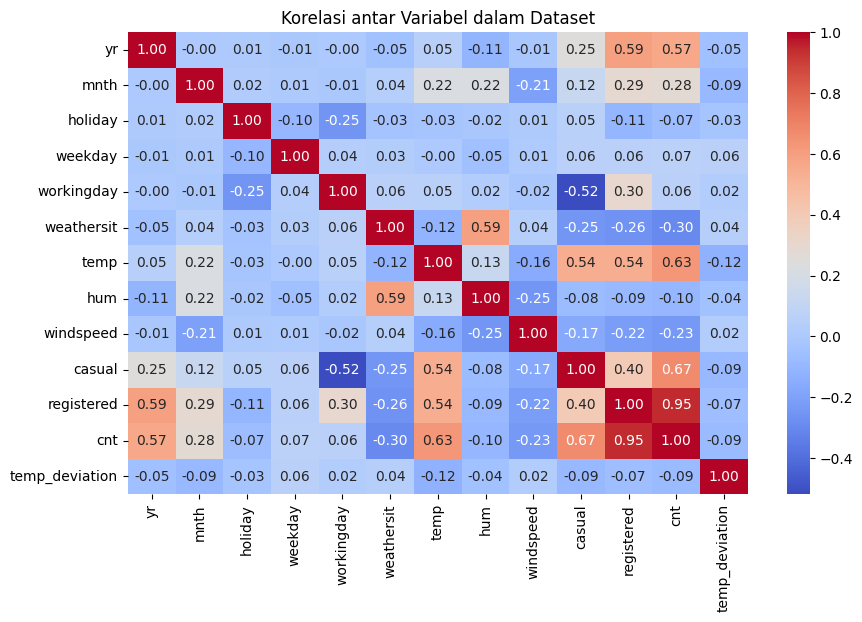

In [80]:
# Memilih hanya kolom numerik
numeric_cols = day_df.select_dtypes(include=['float64', 'int64'])

# Membuat heatmap dengan data korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Variabel dalam Dataset")
plt.show()


**Insight:**
- Suhu memiliki korelasi tinggi dengan jumlah penyewaan sepeda (cnt).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola perbedaan jumlah penyewaan sepeda setelah hari libur besar dibandingkan dengan hari biasa?

<ipython-input-155-1630828b5a70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


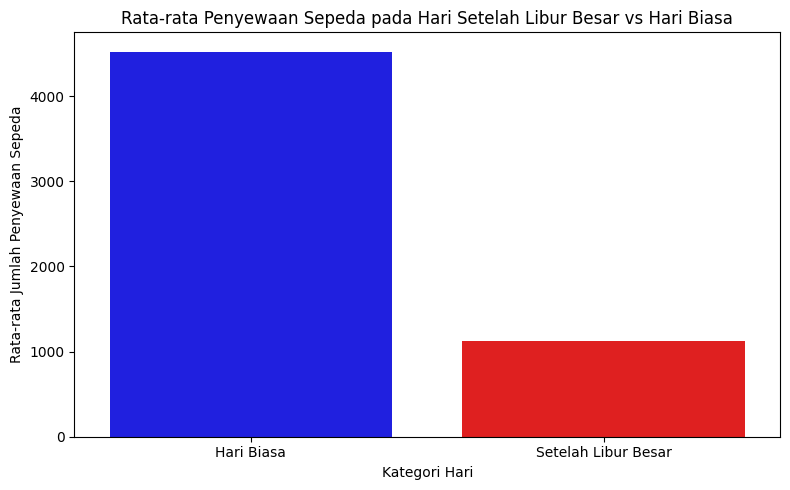

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


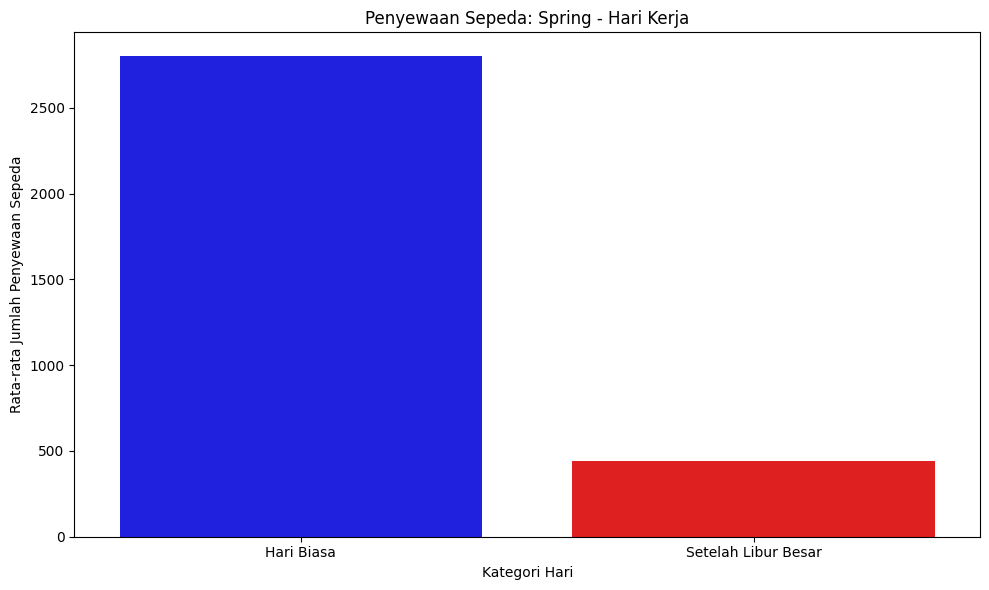

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


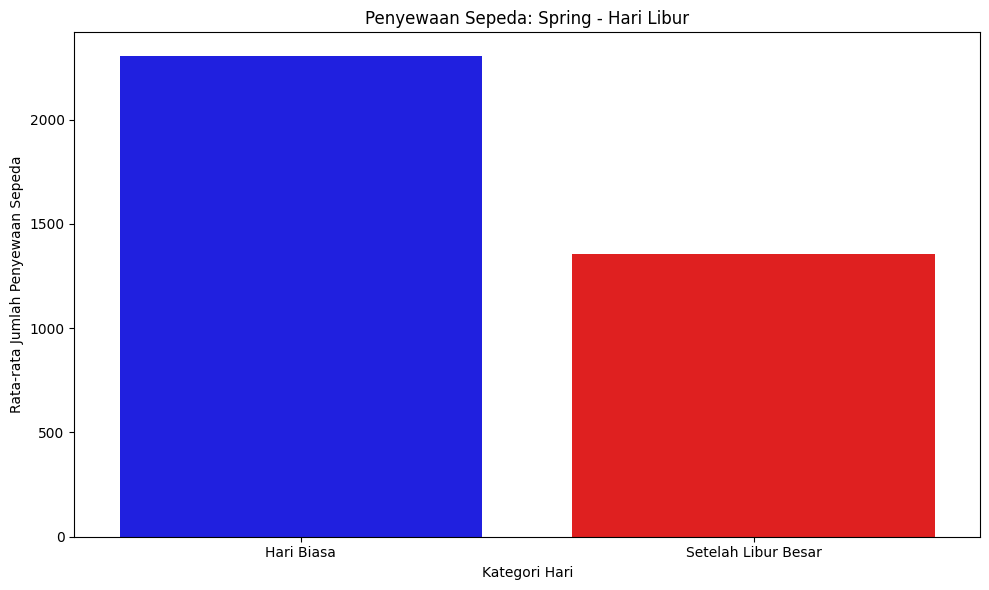

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])
<ipython-input-155-1630828b5a70>:24: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


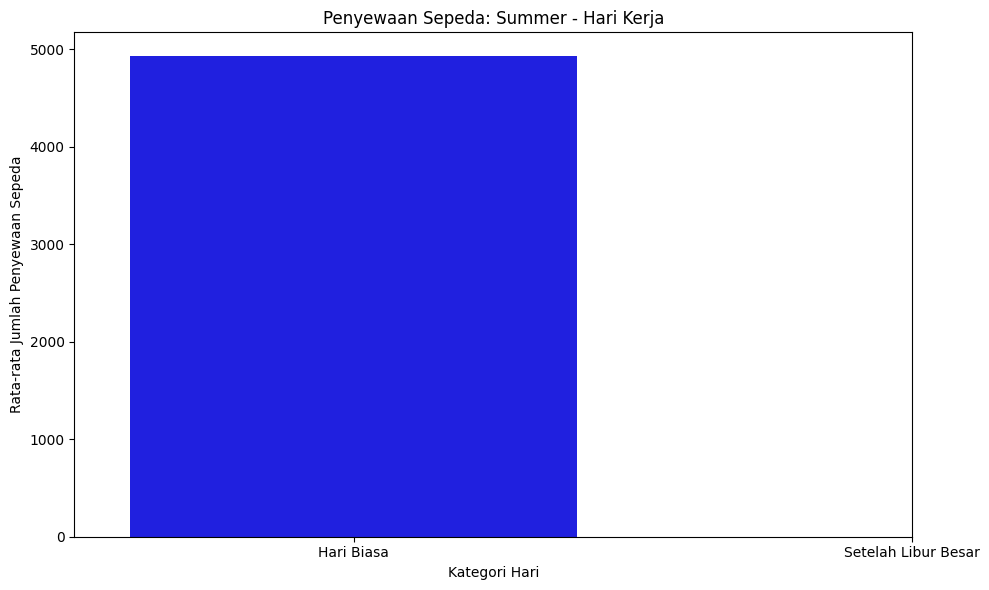

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])
<ipython-input-155-1630828b5a70>:24: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


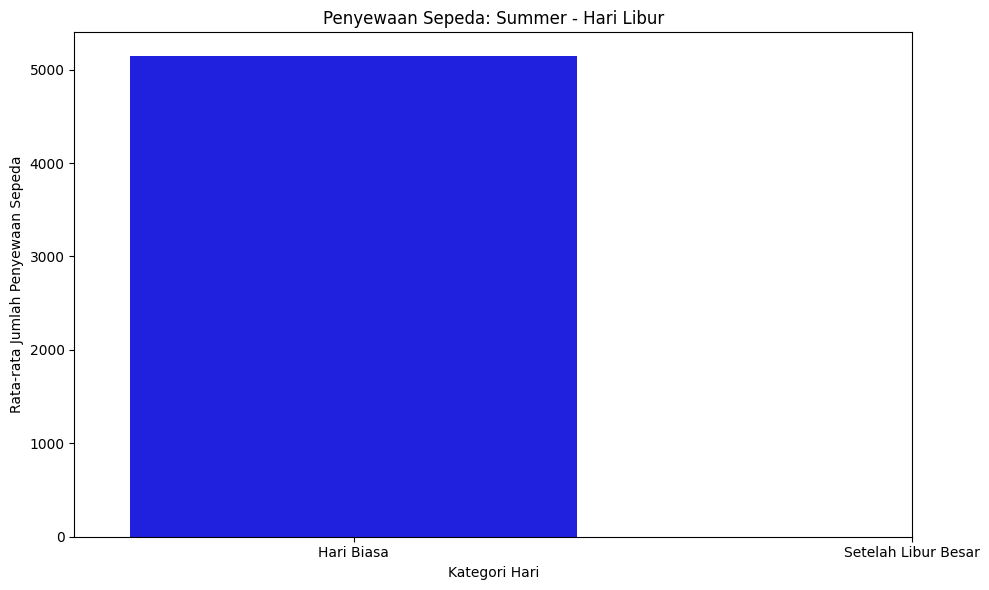

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])
<ipython-input-155-1630828b5a70>:24: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


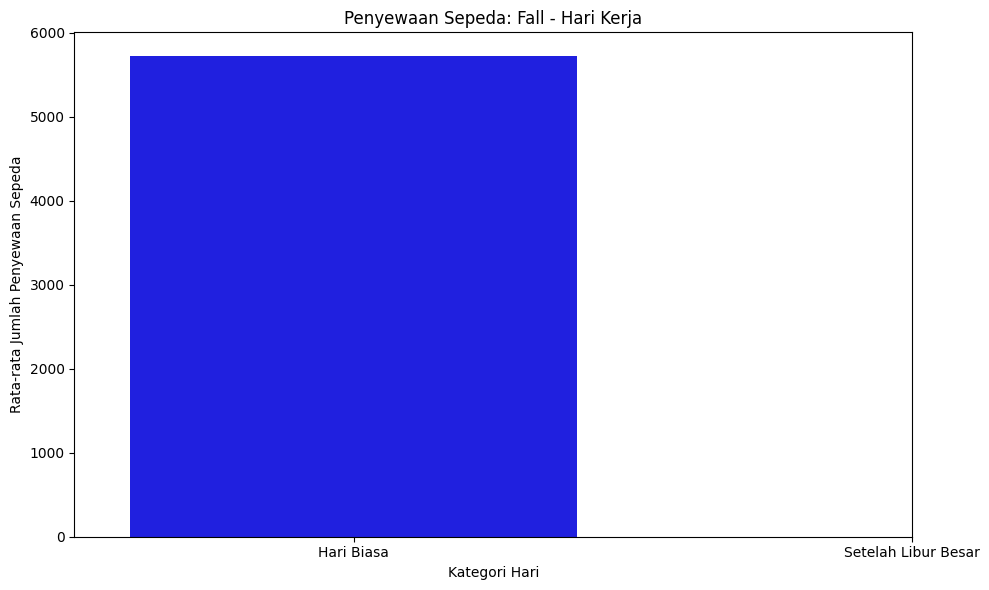

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])
<ipython-input-155-1630828b5a70>:24: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


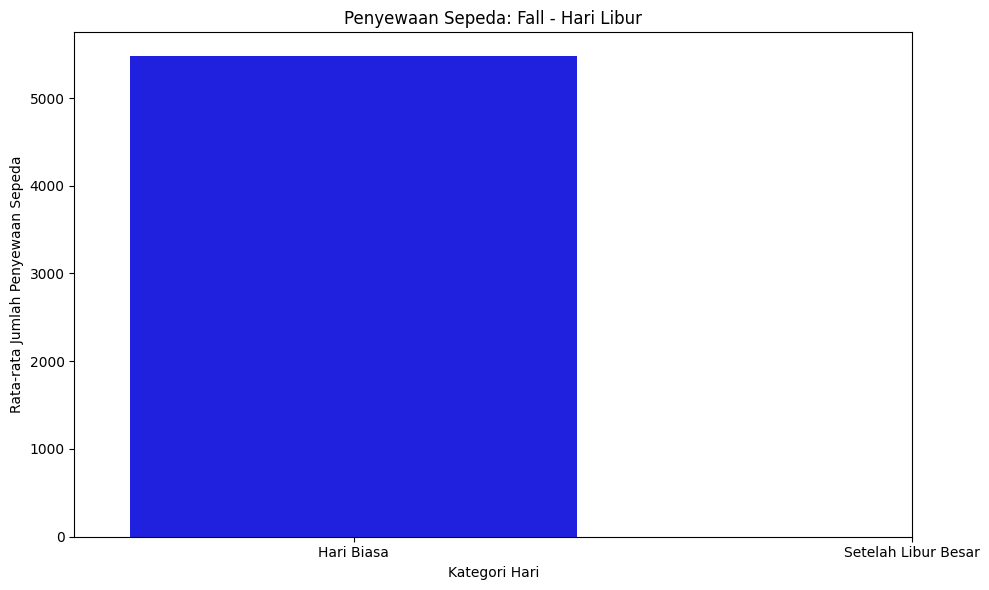

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])
<ipython-input-155-1630828b5a70>:24: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


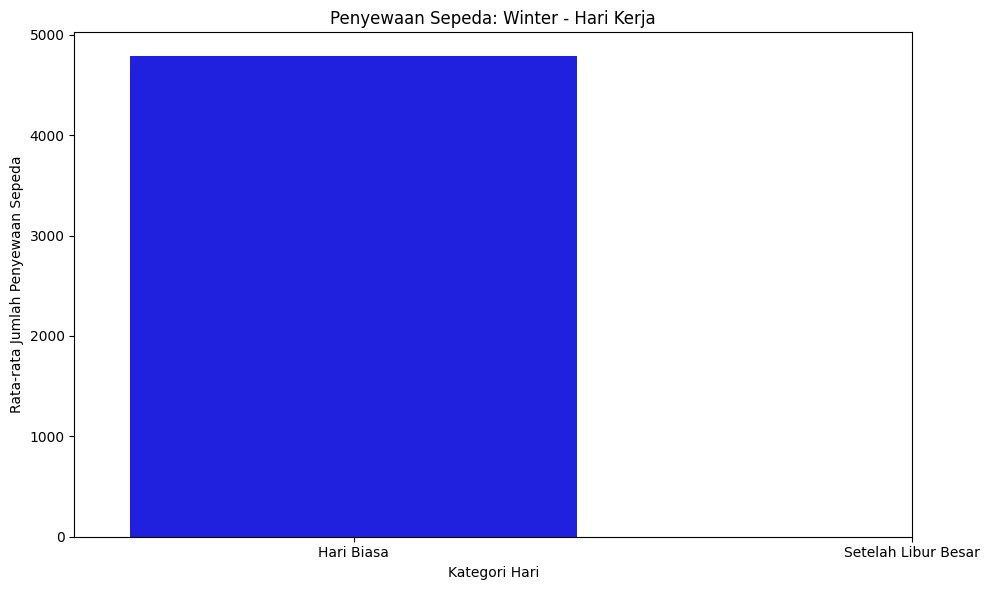

<ipython-input-155-1630828b5a70>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])
<ipython-input-155-1630828b5a70>:24: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])


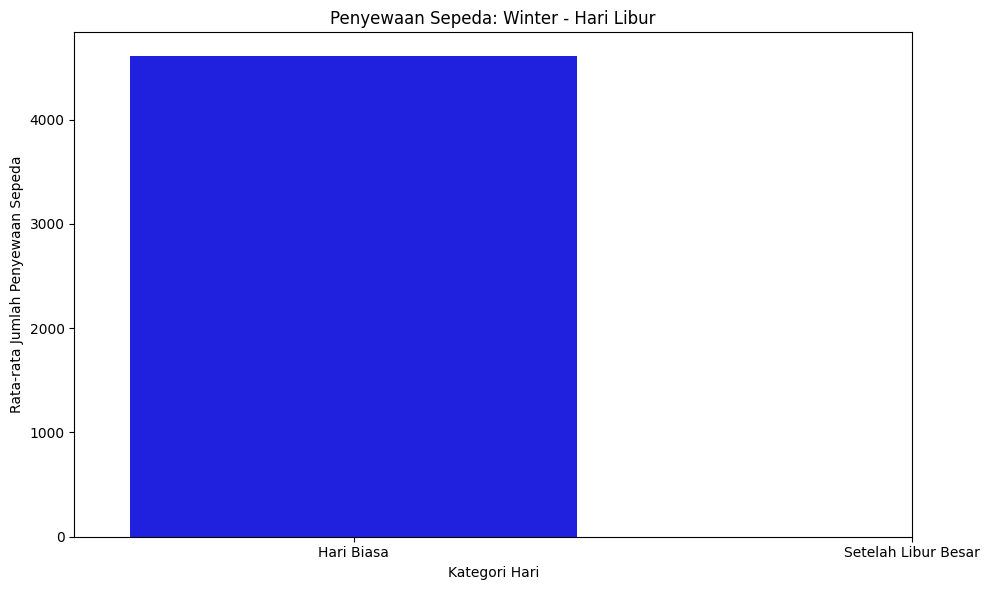

In [155]:
plt.figure(figsize=(8, 5))
avg_cnt = cleaned_df.groupby("after_holiday")["cnt"].mean().reset_index()
sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])

# Tambahkan label kategori hari
plt.xticks([0, 1], ["Hari Biasa", "Setelah Libur Besar"])
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda pada Hari Setelah Libur Besar vs Hari Biasa")
plt.tight_layout()
plt.show()

for season in seasons:
    for day_type in day_types:
        # Filter data berdasarkan musim dan kategori hari
        filtered_data = day_df[(day_df['season'] == season) & (day_df['day_type'] == day_type)]

        # Cek apakah ada data sebelum membuat plot
        if not filtered_data.empty:
            plt.figure(figsize=(10, 6))

            # Menggunakan bar plot untuk rata-rata jumlah penyewaan
            avg_cnt = filtered_data.groupby("after_holiday")["cnt"].mean().reset_index()
            sns.barplot(data=avg_cnt, x="after_holiday", y="cnt", palette=["blue", "red"])

            # Menyesuaikan label x untuk kategori hari
            plt.xticks([0, 1], ["Hari Biasa", "Setelah Libur Besar"])
            plt.xlabel("Kategori Hari")
            plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
            plt.title(f"Penyewaan Sepeda: {season} - {day_type}")
            plt.tight_layout()
            plt.show()

### Pertanyaan 2: Apakah ada pengaruh dari perubahan suhu terhadap jumlah penyewaan sepeda?

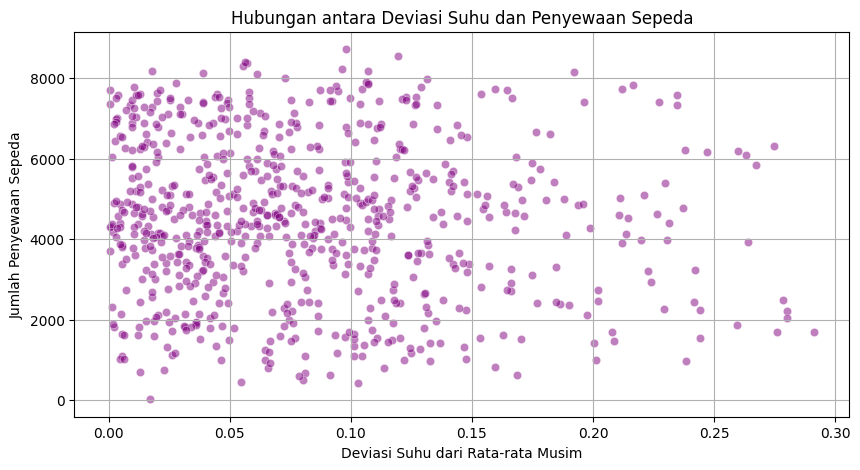

In [82]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cleaned_df, x="temp_deviation", y="cnt", alpha=0.5, color="purple")
plt.xlabel("Deviasi Suhu dari Rata-rata Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan antara Deviasi Suhu dan Penyewaan Sepeda")
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1: Hari setelah libur besar tidak menunjukkan lonjakan signifikan dalam jumlah penyewaan sepeda dibandingkan hari biasa.

- Pertanyaan 2: Perubahan suhu ekstrem (terlalu panas atau terlalu dingin) berdampak negatif pada jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Hari setelah libur besar menunjukkan distribusi jumlah penyewaan yang bervariasi, tetapi median penyewaannya tidak berbeda jauh dengan hari biasa.

- Conclution pertanyaan 2

Perubahan suhu yang signifikan dari rata-rata musim berdampak negatif pada jumlah penyewaan sepeda. Operator bike-sharing dapat mempertimbangkan strategi promosi pada hari-hari dengan suhu ekstrem.